# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

Преподаватель: Олег Булыгин
Домашнее задание
http://prntscr.com/umci7o

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
https://scikit-learn.org/stable/modules/model_evaluation.html

In [90]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors #визиализирует, помогает окрасить точки

In [91]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)], #цифры цвета
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [92]:
iris = load_iris()

In [93]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [94]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target 
data_class
#iris.target, feature_names из библеотеки импортировали
#внизу категории цветов iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
data.drop(columns = data.columns[2:4], inplace = True)
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [98]:
# разделяем выборку на тренировочную и тестовую
#тренируемся на известных данных. часть данных для проверки, 
#а часть для изучения. так делим модель
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2)

In [99]:
len(y_test)

30

In [100]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
#создаем класс
lda = LinearDiscriminantAnalysis()

In [102]:
#обучаем данные на тренировочных данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [103]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 2, 2, 1, 0, 2])

In [104]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
#predict делает прогноз уже обученой модели наших отложеных обученых моделей 
#максимально оптимальные параметры переменных в0, в1 и т.д.
#y-test это специально для проверки на основе x-testa

In [105]:
result
#если одинковые то совпало и ошибок нет len(y_test)=45
#видны ошибки 2, 5 строчка

,0,1
0,2,1
1,2,1
2,0,0
3,2,2
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,2,2


In [106]:
# расчет точности (accuracy_score)  - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test, lda.predict(X_test))
#точность модели показывает
#если  классы несбалансированные, то точность будет плохой метрикой
#использовать другие метрики в таком случае 

0.7666666666666667

In [108]:
# коэффициенты дискриминатных линий (КДЛ)
#13 признаков соответствует нашим признакам
#КДЛ, чем больше число по модулю, тем сильнее влияет данный показатель на
#определение влияния
#alcalinity_of_ash например 2й (sepal width (cm)) показатель больше всего влияет на
#пренадлежность данного объекта к той или иной категории
lda.coef_

array([[-6.00678478,  8.01891622],
       [ 1.97535888, -3.95578189],
       [ 4.76980919, -5.01415536]])

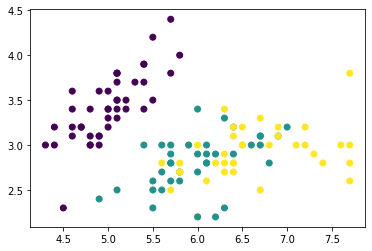

In [109]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()
#на 3 категории разделен график и по 2м сложно их разделить, оставляем 2 категории

In [114]:
#оставлем 0 и 2 категорию
small_train = X_train[(y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 1) | (y_test == 2)]

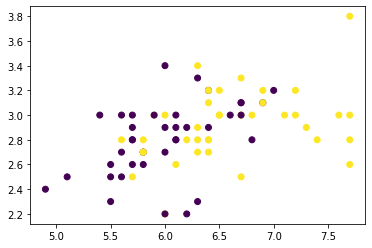

In [115]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()
#1 и 2 пересекаются снова

In [116]:
#оставлем 0 и 2 категорию
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

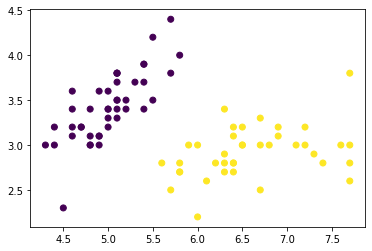

In [117]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()


In [118]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [119]:
# посмотрим на наши центроиды (определяет центры)
lda_small.means_

array([[5.01162791, 3.43255814],
       [6.60263158, 2.91842105]])

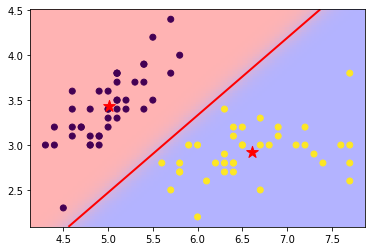

In [122]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')

In [123]:
lda_small.coef_
# второй признак в 12 раз важнее первого для кластеризации (это видно по визуализации)

array([[ 10.70313225, -12.43984465]])

In [124]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))
#уже близкая к 1.0

0.9473684210526315

In [126]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(small_train, sy_train)

LogisticRegression()

In [127]:
lr.predict(small_test)

array([2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2])

In [128]:
accuracy_score(sy_test, lr.predict(small_test))

0.9473684210526315

In [129]:
lr.coef_

array([[ 3.04157319, -1.97219752]])

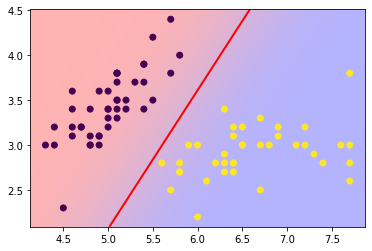

In [130]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')

plt.show()

# Кластеризация

In [131]:
from sklearn.datasets import make_moons, make_blobs

In [132]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [133]:
X

array([[-5.64407835,  3.43599266],
       [ 0.27953864,  5.2001965 ],
       [-3.1978651 ,  5.53377398],
       [-2.96650615,  5.09205367],
       [-0.33388677,  9.66467508],
       [ 6.7103947 ,  7.43843119],
       [ 9.04845057,  4.7796738 ],
       [ 8.86949497,  7.41222664],
       [-2.95887496,  5.72358544],
       [-3.94274227,  1.28328663],
       [14.38172288,  9.57428109],
       [13.91859896,  8.11596593],
       [ 7.01811708,  8.3285074 ],
       [ 7.44376438, 13.58264489],
       [-3.22864819,  3.95832794],
       [ 4.82006959,  6.96992477],
       [-6.08163607, -1.93709086],
       [ 9.28404128,  7.22323509],
       [ 7.5556356 , 11.23689735],
       [-1.77761791,  3.74658311],
       [-3.03728514,  1.64712913],
       [-1.08701149,  2.87738448],
       [-3.58961183,  3.66130137],
       [-7.64718463,  5.56133609],
       [-2.98766909, -2.24082708],
       [ 7.60235718,  6.50721002],
       [-4.68063581,  4.77114522],
       [10.81036654,  7.74071475],
       [-2.17927881,

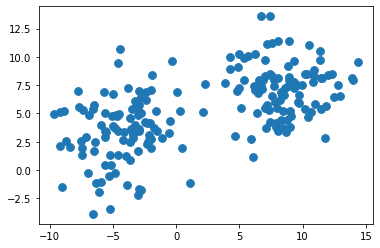

In [136]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

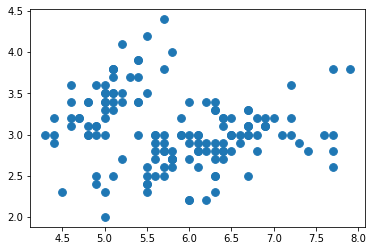

In [137]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', s=60)

In [140]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

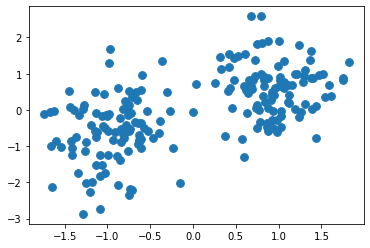

In [143]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)
#масштаб изменился примерно одинаковый стал

In [144]:
from sklearn.cluster import KMeans

In [152]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2) #количество кластеров для разделения
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0])

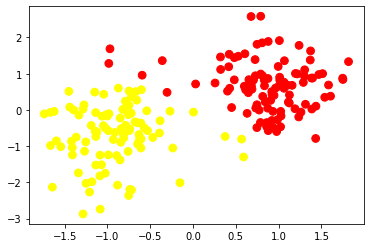

In [153]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
#определение кластеров

In [154]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k) #обучение
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

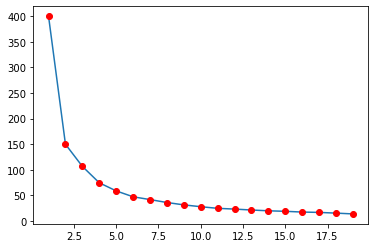

In [155]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#визуализируем локоть и примерно выбираем 3

# Иерархическая кластеризация

In [156]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy 
#тут иерархическая библиотека

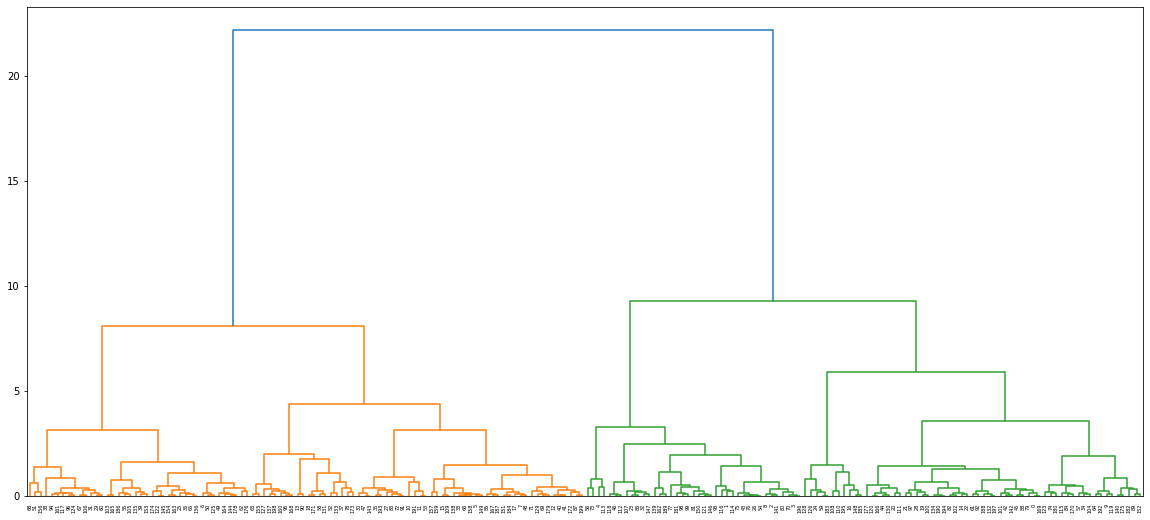

In [157]:
# строим дендрограмму
distance_mat = pdist(X_scaled) 
# pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) 
# linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward') #метод ближних кластеров
#метод Уорлда
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [158]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [162]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

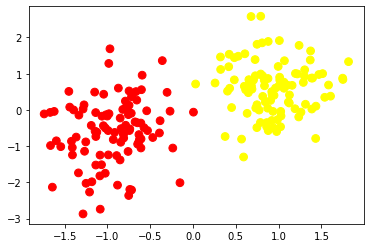

In [163]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
Вывод:
    На графике получилась нормальная выборка по 2м признакам. 
    Точность модели показывает = 0.94, значение близко к 1.0 
    и значит мы можем использовать данную метрику.
    И значит что мы можем использовать данную модель 
    для дальнейщего прогностического анализа и предсказания будущего поведения.
